# Data Importing & Pre-Processing

## Importing all the files

Files:
 * ```capture_test-05```, recording of a Meet call with audio and sound enabled.
 * ```capture_test-06```, recording of a silent environment without any call. Siri is activated via vocal command.
 * ```capture_test-07```, recording of a Meet call with just audio enabled. A ringtone is played.
 * ```capture_test-08```, recording of a silent environment without any call.
 * ```capture_test-09```, recording of a Meet call with just audio enabled. The call has just background noise.

### To-do list

#### ```capture_test-05```
 - [ ] Filter uplink data traffic from Luna's phone.
 - [ ] .
#### ```capture_test-06```
 - [X] Filter uplink data traffic from Luna's phone.
 - [ ] .
#### ```capture_test-07```
 - [ ] Filter uplink data traffic from Luna's phone.
 - [ ] Label it with '1'.
#### ```capture_test-08```
 - [ ] Filter uplink data traffic from Luna's phone.
 - [ ] .
#### ```capture_test-09```
 - [ ] Filter uplink data traffic from Luna's phone.
 - [ ] Label it with '0'.

In [ ]:
# ringtone_capture = 

In [2]:
from data_extraction import read_from_pcap
captures_dir = "captures/" 
captures_files = [captures_dir + f"capture_test-0{i}.cap" for i in range(5,10)]

captures = [read_from_pcap(path=f) for f in captures_files]


In [3]:
from preprocessing import feature_expansion_raw
captures_pd = list(map(lambda x: feature_expansion_raw(x), captures))

In [4]:
captures_pd[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SourceAddress       1105 non-null   object 
 1   DestinationAddress  1763 non-null   object 
 2   Duration            1763 non-null   object 
 3   PacketLength        1763 non-null   int64  
 4   Timestamp           1763 non-null   float64
 5   TimestampOffset     1763 non-null   float64
 6   TransmissionTime    1763 non-null   float64
 7   Bandwidth           1763 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 110.3+ KB


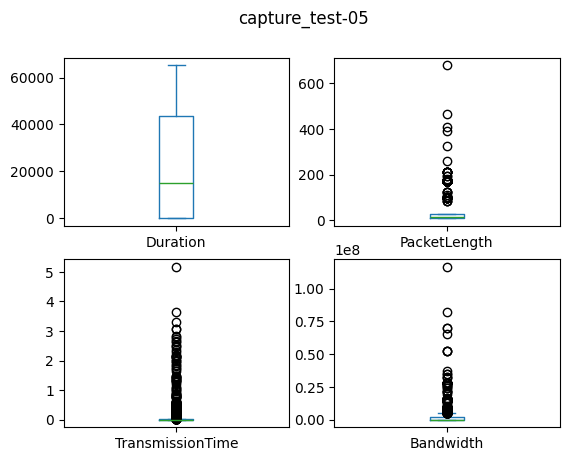

In [5]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2, 2)
plot_cols = ["Duration", "PacketLength", "TransmissionTime", "Bandwidth"]

fig.suptitle("capture_test-05")
for i, c in zip(axs.flat, plot_cols):
    captures_pd[0][c].plot.box(ax=i)

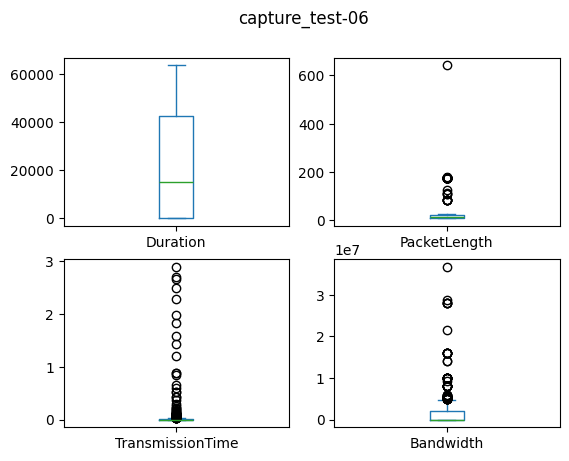

In [6]:
fig, axs = plt.subplots(2, 2)
plot_cols = ["Duration", "PacketLength", "TransmissionTime", "Bandwidth"]

fig.suptitle("capture_test-06")
for i, c in zip(axs.flat, plot_cols):
    captures_pd[1][c].plot.box(ax=i)

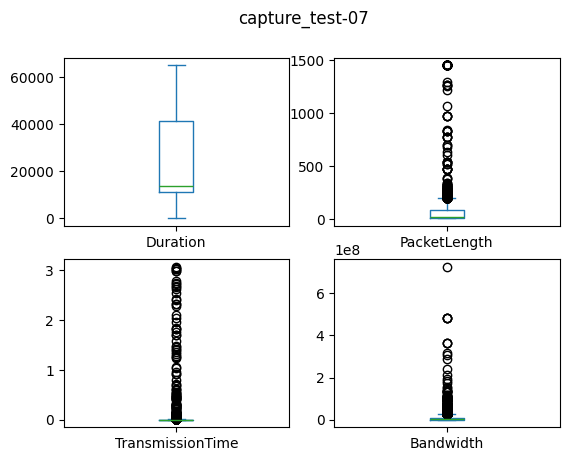

In [7]:
fig, axs = plt.subplots(2, 2)
plot_cols = ["Duration", "PacketLength", "TransmissionTime", "Bandwidth"]

fig.suptitle("capture_test-07")
for i, c in zip(axs.flat, plot_cols):
    captures_pd[2][c].plot.box(ax=i)

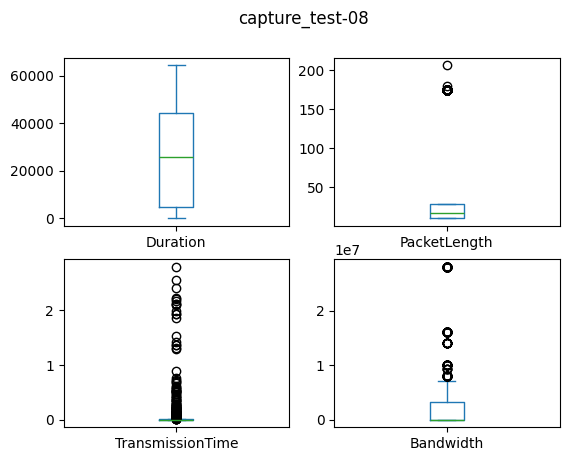

In [8]:
fig, axs = plt.subplots(2, 2)
plot_cols = ["Duration", "PacketLength", "TransmissionTime", "Bandwidth"]

fig.suptitle("capture_test-08")
for i, c in zip(axs.flat, plot_cols):
    captures_pd[3][c].plot.box(ax=i)

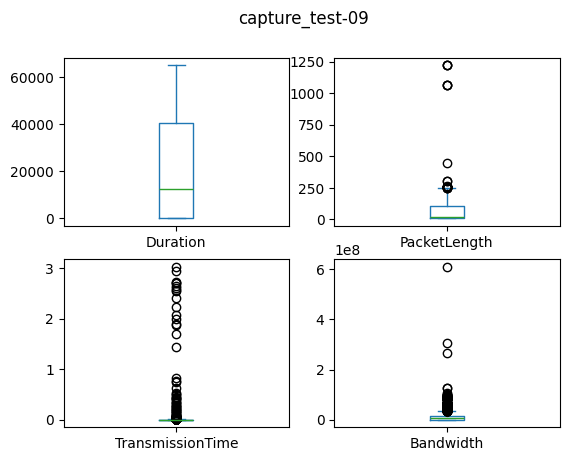

In [9]:
fig, axs = plt.subplots(2, 2)
plot_cols = ["Duration", "PacketLength", "TransmissionTime", "Bandwidth"]

fig.suptitle("capture_test-09")
for i, c in zip(axs.flat, plot_cols):
    captures_pd[4][c].plot.box(ax=i)

## Data Cleaning

### ```capture_test-05```

In [10]:
captures_pd[0].loc[:, "SourceAddress"].unique()

array(['28:39:26:3b:f0:d7', '00:c0:ca:a9:cd:ce', 'ce:e1:bf:00:9a:ca',
       None, '44:48:c1:74:f0:01', '44:48:c1:74:ef:01',
       '44:48:c1:74:ef:00', 'a8:9c:ed:68:ae:71', '00:c0:ca:a9:e7:52',
       '02:c0:ca:a9:cd:ce', '48:5f:99:a8:3b:1f', '5e:4b:d4:81:9d:b6',
       '6c:c4:9f:4b:46:61', '7c:c2:25:9c:f3:e4', '86:6b:8a:20:05:76',
       'ba:5f:26:3f:9e:1a', '44:48:c1:74:f0:61', '64:79:f0:2b:a2:00'],
      dtype=object)

### ```capture_test-06```

In [11]:
captures_pd[1].loc[:, "SourceAddress"].unique()
target_source_address = "ce:e1:bf:00:9a:ca"
filtered_capture_6 = captures_pd[1].loc[captures_pd[1]["SourceAddress"] == target_source_address, :]

In [12]:
filtered_capture_6

,SourceAddress,DestinationAddress,Duration,PacketLength,Timestamp,TimestampOffset,TransmissionTime,Bandwidth
4,ce:e1:bf:00:9a:ca,00:c0:ca:a9:cd:ce,26114,24,1.705422e+09,1.874525,0.855028,2.806926e+01
5,ce:e1:bf:00:9a:ca,00:c0:ca:a9:cd:ce,26114,24,1.705422e+09,1.875136,0.000611,3.927987e+04
6,ce:e1:bf:00:9a:ca,00:c0:ca:a9:cd:ce,26114,24,1.705422e+09,1.876036,0.000900,2.666667e+04
7,ce:e1:bf:00:9a:ca,00:c0:ca:a9:cd:ce,26114,24,1.705422e+09,1.886045,0.010009,2.397842e+03
8,ce:e1:bf:00:9a:ca,00:c0:ca:a9:cd:ce,26114,24,1.705422e+09,1.887352,0.001307,1.836266e+04
9,ce:e1:bf:00:9a:ca,00:c0:ca:a9:cd:ce,26114,24,1.705422e+09,1.890585,0.003233,7.423446e+03
10,ce:e1:bf:00:9a:ca,00:c0:ca:a9:cd:ce,26114,24,1.705422e+09,1.979511,0.088926,2.698873e+02
11,ce:e1:bf:00:9a:ca,00:c0:ca:a9:cd:ce,26114,24,1.705422e+09,2.104550,0.125039,1.919401e+02
12,ce:e1:bf:00:9a:ca,00:c0:ca:a9:cd:ce,26114,24,1.705422e+09,2.105587,0.001037,2.314368e+04
129,ce:e1:bf:00:9a:ca,00:c0:ca:a9:cd:ce,11264,24,1.705422e+09,17.168276,0.046302,5.183361e+02


### ```capture_test-07```

In [16]:
captures_pd[2].loc[:, "SourceAddress"].unique()
target_source_address = "ce:e1:bf:00:9a:ca"
filtered_capture_7 = captures_pd[2].loc[captures_pd[2]["SourceAddress"] == target_source_address, :]

In [22]:
filtered_capture_7.to_csv("datasets/capture_test-07_filtered.csv")

<Axes: xlabel='TimestampOffset'>

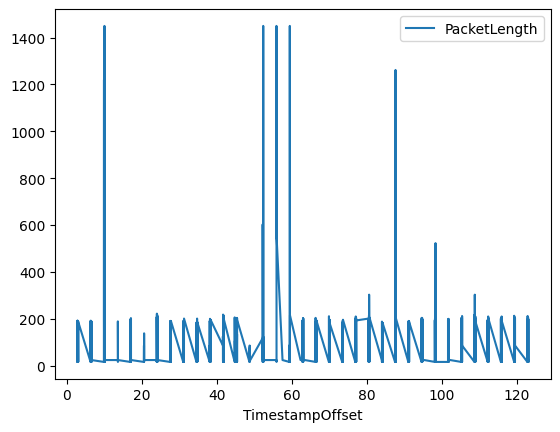

In [25]:
filtered_capture_7.plot.line(x="TimestampOffset", y="PacketLength")